## Qual problema eu quero resolver?
Previsão de casos de dengue nos próximos anos

In [1]:
%run ./utils.ipynb

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("./data_2000_2019.csv")

Códigos e nomes de microrregiões, códigos e nomes de mesorregiões, códigos e nomes estaduais, códigos e nomes de regiões, códigos e nomes de bioma, códigos e nomes de ecozona, regimes e nomes climáticos, meses, anos, tempos, casos de dengue, estimativas populacionais, densidade populacional, temperaturas máximas e mínimas, índice de gravidade da seca de Palmer, porcentagens da população urbana, acesso a porcentagens de rede de água e frequência de escassez de água relatada estão todos incluídos no conjunto de dados. 

In [15]:
df.head()

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837


# Tamanho do conjunto de dados

In [16]:
print("Tamanho do conjunto de dados: ", df.shape)

Tamanho do conjunto de dados:  (133920, 26)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133920 entries, 0 to 133919
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   micro_code       133920 non-null  int64  
 1   micro_name       133920 non-null  object 
 2   micro_name_ibge  133920 non-null  object 
 3   meso_code        133920 non-null  int64  
 4   meso_name        133920 non-null  object 
 5   state_code       133920 non-null  int64  
 6   state_name       133920 non-null  object 
 7   region_code      133920 non-null  int64  
 8   region_name      133920 non-null  object 
 9   biome_code       133920 non-null  int64  
 10  biome_name       133920 non-null  object 
 11  ecozone_code     133920 non-null  int64  
 12  ecozone_name     133920 non-null  object 
 13  main_climate     133920 non-null  object 
 14  month            133920 non-null  int64  
 15  year             133920 non-null  int64  
 16  time             133920 non-null  int6

## Descrição dos atributos
<ul>
<li>PDSI: Indice de gravidade de seca de Palmer</li>
<li>water_network: Porcetagem de rede de água</li>
<li>water_shortage: Frequência de escassez de água relatada</li>
<li>urban: População urbana</li>
</ul>



PALMER (1965) define seca como o intervalo de tempo, geralmente da ordem de meses ou até anos, durante o qual o abastecimento hídrico de uma região cai consideravelmente em relação ao "climatologicamente" esperado ou apropriado. 

# Filtrando atributos
Gerando um novo dataframe com os atributos mais essenciais

In [7]:
df = df[['micro_name_ibge', 'state_name', 'region_name', 'biome_name', 'ecozone_name', 'main_climate', 'month', 'year', 'dengue_cases', 'population', 'pop_density', 'tmax', 'tmin', 'pdsi', 'urban', 'water_network', 'water_shortage']]
df.columns = ['nome', 'estado', 'regiao', 'bioma', 'ecozona', 'clima_principal', 'mes', 'ano', 'casos_dengue', 'populacao', 'densidade_populacional', 'temp_max', 'temp_min', 'pdsi', 'pop_urbana', 'rede_agua', 'escassez_agua']

In [8]:
df.head()

,nome,estado,regiao,bioma,ecozona,clima_principal,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
0,PORTO VELHO,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,ARIQUEMES,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,JI-PARANÁ,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Rondônia,North,Amazon,Amazon,AM,1,2000,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837


In [9]:
df.describe()

,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
count,133920.000000,133920.000000,127224.000000,1.272240e+05,127224.000000,133920.000000,133920.000000,133680.000000,133920.000000,133920.000000,133920.000000
mean,6.500000,2009.500000,101.358965,3.451623e+05,102.588820,29.417284,18.980845,-0.459147,72.098190,72.286989,0.357296
std,3.452065,5.766303,971.192888,8.878110e+05,365.514023,3.461089,3.644395,1.907180,16.630274,17.021309,0.240645
min,1.000000,2000.000000,0.000000,2.096000e+03,0.227461,14.425291,4.615391,-7.634145,22.300000,16.680000,0.000000
25%,3.750000,2004.750000,0.000000,1.013560e+05,12.397913,27.555401,16.923784,-1.750176,58.390000,62.680000,0.160100
50%,6.500000,2009.500000,4.000000,1.737065e+05,31.785652,30.162950,19.892204,-0.566704,72.750000,74.875000,0.325850
75%,9.250000,2014.250000,29.000000,3.046640e+05,63.268632,31.774971,21.770352,0.717594,86.680000,85.700000,0.531700
max,12.000000,2019.000000,88821.000000,1.504189e+07,6374.149599,37.885544,25.765200,7.479940,100.000000,98.810000,1.000000


In [10]:
print(df.shape)
df.isnull().sum()

(133920, 17)


nome                         0
estado                       0
regiao                       0
bioma                        0
ecozona                      0
clima_principal              0
mes                          0
ano                          0
casos_dengue              6696
populacao                 6696
densidade_populacional    6696
temp_max                     0
temp_min                     0
pdsi                       240
pop_urbana                   0
rede_agua                    0
escassez_agua                0
dtype: int64

In [11]:
# função round recebe dois parâmetros, um numero float e um inteiro representando a quantidade de casas decimais
df_nulos = pd.DataFrame({'Colunas': df.columns, 'Tipos': df.dtypes, 'Percentual nulos': round(df.isnull().sum()/df.shape[0], 2)})
print("Percentual de dados nulos de cada atributo do dataframe")
df_nulos

Percentual de dados nulos de cada atributo do dataframe


,Colunas,Tipos,Percentual nulos
nome,nome,object,0.00
estado,estado,object,0.00
regiao,regiao,object,0.00
bioma,bioma,object,0.00
ecozona,ecozona,object,0.00
clima_principal,clima_principal,object,0.00
mes,mes,int64,0.00
ano,ano,int64,0.00
casos_dengue,casos_dengue,float64,0.05
populacao,populacao,float64,0.05


## Remoção de linhas com dados nulos

In [14]:
print(df.shape)
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

(133920, 17)


,nome,estado,regiao,bioma,ecozona,clima_principal,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
6696,PORTO VELHO,Rondônia,North,Amazon,Amazon,AM,1,2001,267.0,426640.0,6.503234,30.180363,21.471796,-0.311743,85.20,33.57,0.2245
6697,GUAJARÁ-MIRIM,Rondônia,North,Amazon,Amazon,AM,1,2001,12.0,61321.0,1.504577,30.369087,21.300480,-0.803746,72.31,27.43,0.0873
6698,ARIQUEMES,Rondônia,North,Amazon,Amazon,AM,1,2001,2.0,143809.0,5.903734,30.084492,21.183846,-0.022145,66.91,27.76,0.1871
6699,JI-PARANÁ,Rondônia,North,Amazon,Amazon,AM,1,2001,93.0,306896.0,12.241386,29.946037,20.736881,-0.269979,68.68,32.23,0.2381
6700,ALVORADA D'OESTE,Rondônia,North,Amazon,Amazon,AM,1,2001,1.0,74460.0,4.658250,29.965841,20.655041,-1.247326,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133915,MEIA PONTE,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,111.0,409691.0,19.397264,31.148733,21.699646,-2.526940,89.69,79.10,0.4656
133916,PIRES DO RIO,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,42.0,100780.0,10.579541,29.929796,20.871635,-1.855514,72.80,71.34,0.2444
133917,CATALÃO,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,57.0,176527.0,11.591627,30.154041,20.992001,-2.663716,89.47,88.74,0.6508
133918,QUIRINÓPOLIS,Goiás,Centre-West,Cerrado,Cerrado,AW,12,2019,41.0,128463.0,7.991280,32.152596,22.195051,-3.365225,85.36,77.39,0.4802


Antes tinhamos 133920 linhas, após a remoção ficamos com 126996 linhas

In [15]:
df.describe()

,mes,ano,casos_dengue,populacao,densidade_populacional,temp_max,temp_min,pdsi,pop_urbana,rede_agua,escassez_agua
count,133920.000000,133920.000000,127224.000000,1.272240e+05,127224.000000,133920.000000,133920.000000,133680.000000,133920.000000,133920.000000,133920.000000
mean,6.500000,2009.500000,101.358965,3.451623e+05,102.588820,29.417284,18.980845,-0.459147,72.098190,72.286989,0.357296
std,3.452065,5.766303,971.192888,8.878110e+05,365.514023,3.461089,3.644395,1.907180,16.630274,17.021309,0.240645
min,1.000000,2000.000000,0.000000,2.096000e+03,0.227461,14.425291,4.615391,-7.634145,22.300000,16.680000,0.000000
25%,3.750000,2004.750000,0.000000,1.013560e+05,12.397913,27.555401,16.923784,-1.750176,58.390000,62.680000,0.160100
50%,6.500000,2009.500000,4.000000,1.737065e+05,31.785652,30.162950,19.892204,-0.566704,72.750000,74.875000,0.325850
75%,9.250000,2014.250000,29.000000,3.046640e+05,63.268632,31.774971,21.770352,0.717594,86.680000,85.700000,0.531700
max,12.000000,2019.000000,88821.000000,1.504189e+07,6374.149599,37.885544,25.765200,7.479940,100.000000,98.810000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x76dee3e0c290>,
      dtype=object)

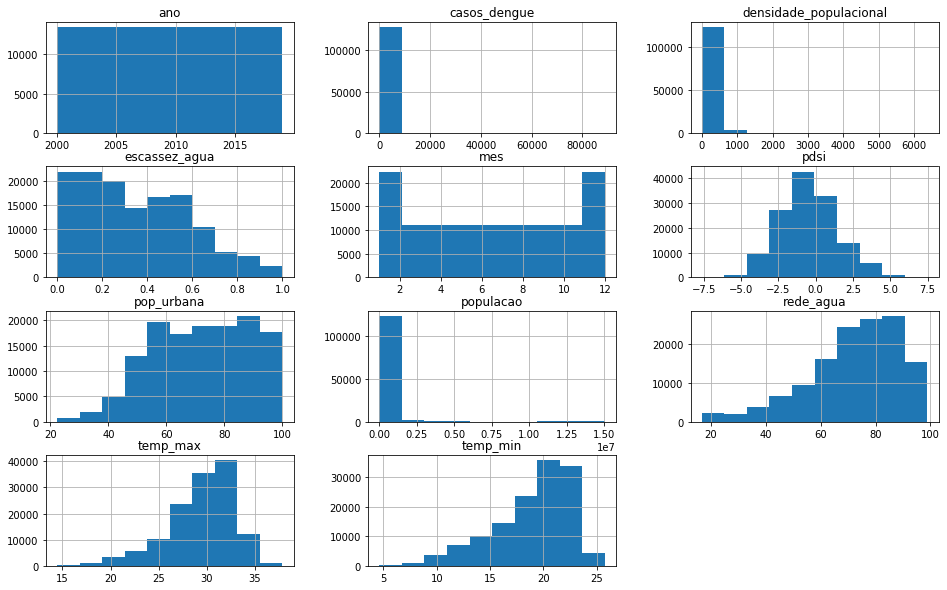

In [16]:
df.hist(figsize=(16,10))

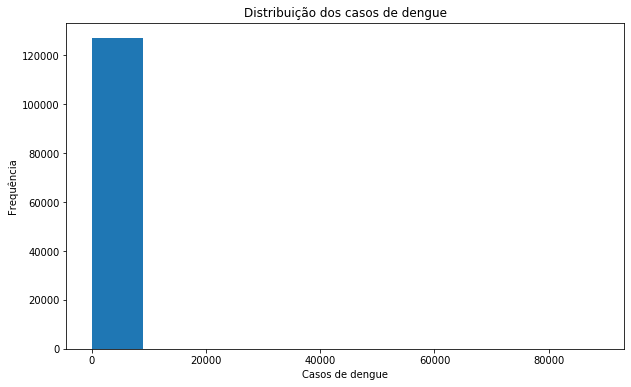

In [50]:
plt.figure(figsize=(10,6))
plt.hist(data=df, x="casos_dengue")
plt.title("Distribuição dos casos de dengue")
plt.xlabel("Casos de dengue")
plt.ylabel("Frequência")
plt.show()

No histograma de PDSI o valor de maior frequência está entre -2.5 e 0. Já o atributo rede de agua os valores de maior frequência está entre 80 e 100. O atributo temperatura máxima tem como valor de maior frequência enre 30 e 35. Por fim, o atributo temperatura mínima os valores de maior frequência estão entre 20 e 25.

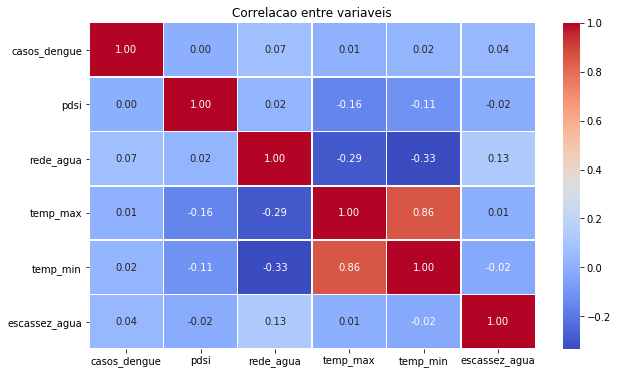

In [17]:
grafico_correlacao(df, ['regiao', 'casos_dengue', 'pdsi', 'rede_agua', 'temp_max', 'temp_min', 'escassez_agua'], "Correlacao entre variaveis")

O valor negativo nessa gráfico quer dizer que a relação entre os atributos é inversamente proporcional, ou seja rede_agua e temp_min é inversamente proporcional uma em relação a outra, assim como os atributos rede_agua e temp_max.
<b>Com base niso é interessante analisarmos a relação entre esses atributos em um gráfico</b>

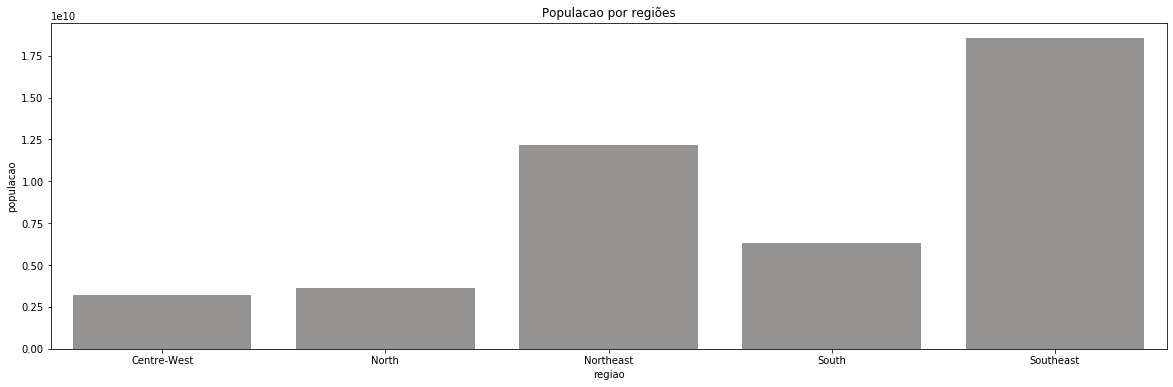

In [18]:
populacao_por_regiao = agrupar(df, 'regiao', 'populacao')
grafico_barras(populacao_por_regiao, 'regiao', 'populacao', "Populacao por regiões")

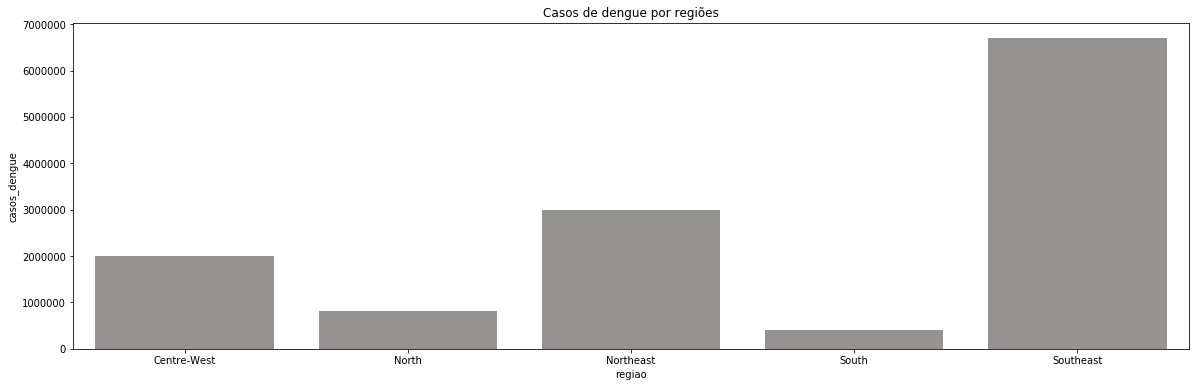

In [19]:
casos_de_dengue_por_regiao = agrupar(df, 'regiao', 'casos_dengue')
grafico_barras(casos_de_dengue_por_regiao, 'regiao', 'casos_dengue', 'Casos de dengue por regiões')

Era esperado que a região sul teria mais casos de dengue por abarcar uma população maior em relação a região norte e centro-oeste, mas percebemos que isso não acontece. Será que eu quero destacar isso?

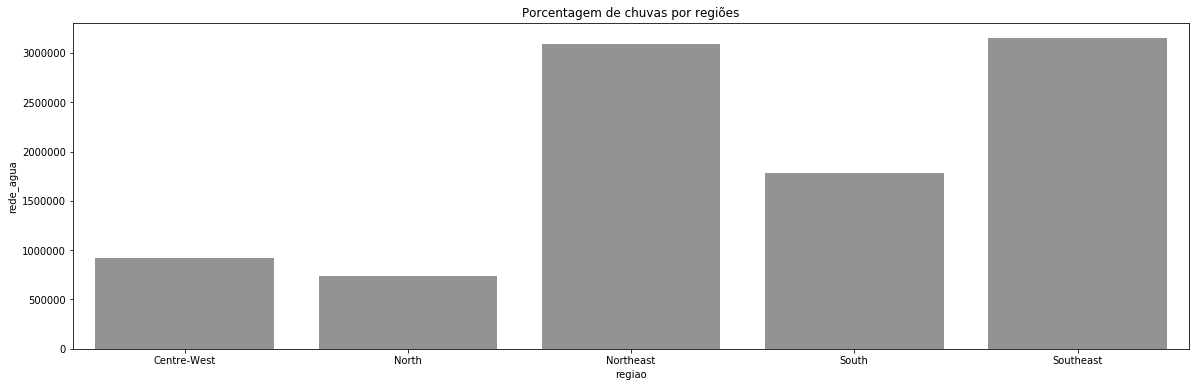

In [20]:
chuva_por_regioes = agrupar(df, 'regiao', 'rede_agua')
grafico_barras(chuva_por_regioes, 'regiao', 'rede_agua', 'Porcentagem de chuvas por regiões')

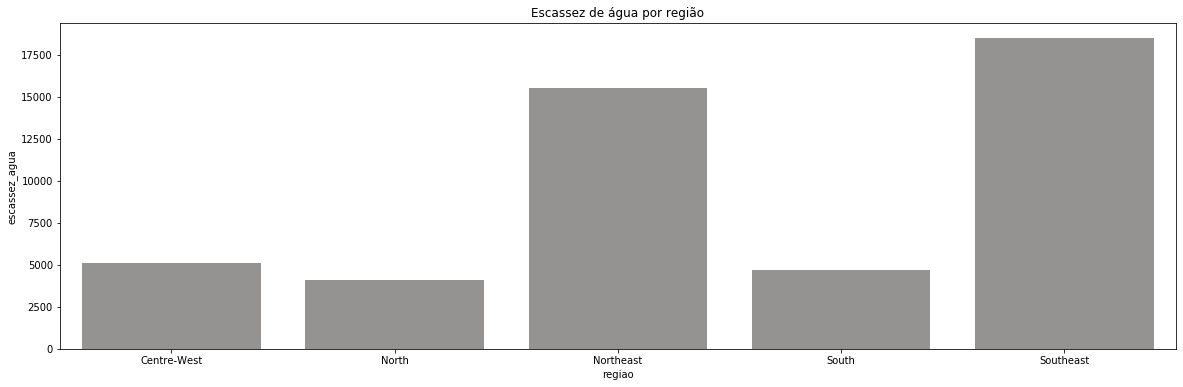

In [21]:
escasses_por_regiao = agrupar(df, 'regiao', 'escassez_agua')
grafico_barras(escasses_por_regiao, 'regiao', 'escassez_agua', 'Escassez de água por região')

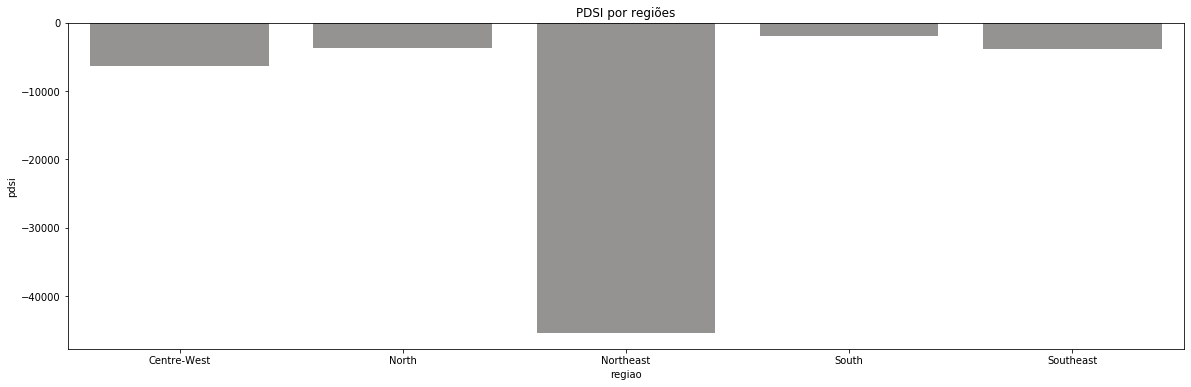

In [22]:
pdsi_por_regiao = agrupar(df, 'regiao', 'pdsi')
grafico_barras(pdsi_por_regiao, 'regiao', 'pdsi', 'PDSI por regiões')

Quanto mais negativo o valor do PDSI mais seca é a região.

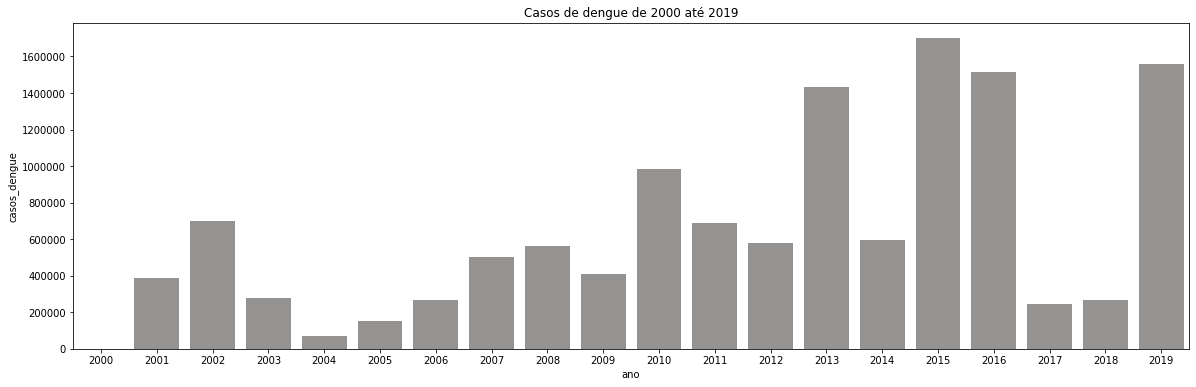

In [23]:
anos = agrupar(df, 'ano', 'casos_dengue')
grafico_barras(anos, 'ano', 'casos_dengue', 'Casos de dengue de 2000 até 2019')